
NumPy, Pandas & Matplotlib Integration

Last Updated: November 20th, 2024

Objective:

Apply your knowledge of NumPy, Pandas, and Matplotlib to analyze a real-world dataset. Utilize advanced statistical functions and array operations in NumPy, and integrate these with Pandas for data manipulation and Matplotlib for visualization.


Dataset:

You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

Download the dataset here.

or you can download it directly

Here.


Tasks:

    Data Import and Cleaning:
        Import the dataset using Pandas.
        Identify missing values and handle them appropriately.
        Use NumPy to convert relevant columns to numerical types if necessary.

    Exploratory Data Analysis:
        Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
        Explore the distribution of power plants by country and fuel type.

    Statistical Analysis:
        Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
        Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

    Time Series Analysis:
        If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
        Explore how the mix of fuel types for power generation has evolved over the years.

    Advanced Visualization:
        Create visualizations using Matplotlib and Seaborn to illustrate your findings.
        Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

    Matrix Operations in Real-World Context:
        Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
        Discuss the relevance of eigenvectors and eigenvalues in this context.

    Integrating NumPy with Pandas and Matplotlib:
        Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
        Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from skimpy import skim
from scipy.stats import ttest_ind

In [13]:

df = pd.read_csv("global_power_plant_database.csv", low_memory=False)
print(df.head())

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

In [5]:
print(df.describe())

        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        17447.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           23.397835   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1988.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2014.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000          6417.000000          7226.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.606428          2174.833482          2231.464288   
min              2000.000000          -947.600000          -989.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [12]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 34936  │ │ string      │ 19    │                                                          │
│ │ Number of columns │ 36     │ │ float64     │ 17    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA    ┃ NA %          ┃ mean   ┃ sd    ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ capacity_mw   │     0 │             0 │  163.4 │ 489.6 │      1 │    4.9 │  16.74 │ 75.34 │ 22500 │   ▇    │  │
│ │ latitude      │     0 │             0 │  32.82 │ 22.64 │ -77.85 │  29.26 │  39.73 │ 46.26 │ 71.29 │   ▁▁▇▃ │  │
│ │ longitude     │     0 │             0 │ -6.973 │ 78.41 │   -180 │ -77.64 │ -2.127 │  49.5 │ 179.4 │ ▁▇▅▆▅▂ │  │
│ │ commissioning │ 17489 │ 50.0601099152 │   1997 │  23.4 │   1896 │   1988 │   2007 │  2014 │  2020 │    ▁▂▇ │  │
│ │ _year         │       │          7364 │        │       │        │        │        │       │       │        │  │
│ │ year_of_capac │ 20049 │ 57.3877948248 │   2018 │ 1.606 │   2000 │   2017 │   2019 │  2019 │  2019 │      ▇ │  │
│ │ ity_data      │       │         22535 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 28519 │ 81.6321273185 │  592.7 │  2175 │ -947.6 │  1.947 │  23.43 │ 199.7 │ 50830 │   ▇    │  │
│ │ h_2013        │       │           253 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 27710 │ 79.3164643920 │  656.9 │  2231 │ -989.6 │   2.26 │  23.61 │ 226.3 │ 32320 │   ▇    │  │
│ │ h_2014        │       │          3114 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 26733 │ 76.5199221433 │  762.4 │  2533 │ -864.4 │  2.665 │  26.14 │ 285.9 │ 37430 │   ▇    │  │
│ │ h_2015        │       │          4784 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25792 │ 73.8264254637 │  693.1 │  2405 │ -768.6 │  2.729 │  22.46 │ 249.9 │ 32380 │   ▇    │  │
│ │ h_2016        │       │          0506 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25436 │ 72.8074192809 │  661.8 │  2369 │ -934.9 │  2.467 │  17.88 │ 214.5 │ 36450 │   ▇    │  │
│ │ h_2017        │       │          7092 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25299 │ 72.4152736432 │  517.3 │  1975 │ -982.6 │  2.242 │  12.53 │ 151.1 │ 35140 │   ▇    │  │
│ │ h_2018        │       │          3333 │        │       │        │        │        │       │       │        │  │
│ │ generation_gw │ 25277 │ 72.3523013510 │  423.9 │  1699 │ -780.3 │  2.752 │  11.53 │ 122.8 │ 31920 │   ▇    │  │
│ │ h_2019        │       │           419 │        │       │        │        │        │       │       │        │  │
│ │ estimated_gen │ 18816 │ 53.8584840851 │  239.1 │  1191 │   1.12 │   8.62 │  27.62 │ 106.8 │ 48680 │   ▇    │  │
│ │ eration_gwh_2 │       │          8434 │        │    

In [14]:
print("\ncolonnes :")
print(df.columns)


colonnes :
Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')


In [17]:
# taille initiale
print(f"\ntaille initiale : {df.shape}")


taille initiale : (34936, 36)


In [18]:
# suppression des doublons
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"\ndoublons supprimes : {initial_shape[0] - df.shape[0]}")


doublons supprimes : 0


In [19]:
# valeurs manquantes par colonne
missing = df.isnull().sum()
missing = missing[missing > 0]
print("\ncolonnes avec valeurs manquantes :")
print(missing)


colonnes avec valeurs manquantes :
other_fuel1                      32992
other_fuel2                      34660
other_fuel3                      34844
commissioning_year               17489
owner                            14068
source                              15
url                                 18
geolocation_source                 419
wepp_id                          18702
year_of_capacity_data            20049
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
generation_data_source           23536
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
dtype: int64


In [20]:
# pourcentage de valeurs manquantes
missing_percent = (missing / len(df)) * 100
print("\npourcentage de valeurs manquantes :")
print(missing_percent.sort_values(ascending=False))


pourcentage de valeurs manquantes :
other_fuel3                      99.736661
other_fuel2                      99.209984
other_fuel1                      94.435539
generation_gwh_2013              81.632127
generation_gwh_2014              79.316464
generation_gwh_2015              76.519922
generation_gwh_2016              73.826425
generation_gwh_2017              72.807419
generation_gwh_2018              72.415274
generation_gwh_2019              72.352301
generation_data_source           67.368903
year_of_capacity_data            57.387795
estimated_generation_gwh_2013    53.858484
wepp_id                          53.532173
estimated_generation_gwh_2014    52.762194
estimated_generation_gwh_2015    51.196474
commissioning_year               50.060110
estimated_generation_gwh_2016    49.708038
owner                            40.267918
estimated_generation_gwh_2017     5.146554
geolocation_source                1.199336
url                               0.051523
source           

In [21]:
# colonnes avec plus de 50 pourcent de valeurs manquantes
high_nan_cols = missing_percent[missing_percent > 50].index.tolist()
print("\ncolonnes avec plus de 50 pourcent de valeurs manquantes :")
print(high_nan_cols)


colonnes avec plus de 50 pourcent de valeurs manquantes :
['other_fuel1', 'other_fuel2', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015']


In [23]:
# suppression des colonnes trop vides
# df.drop(columns=high_nan_cols, inplace=True)

# verification des types
print("\ntypes de donnees :")
print(df.dtypes)

# correction typage
# df["commissioning_year"] = pd.to_numeric(df["commissioning_year"], errors="coerce")


types de donnees :
country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh


Statistiques de la capacite :
count    34936.000000
mean       163.355148
std        489.636072
min          1.000000
25%          4.900000
50%         16.745000
75%         75.344250
max      22500.000000
Name: capacity_mw, dtype: float64

Top 10 des pays avec le plus de centrales :
country_long
United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
India                       1589
Germany                     1309
Canada                      1159
Spain                        829
Russia                       545
Name: count, dtype: int64

Nombre de centrales par carburant :
primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogener

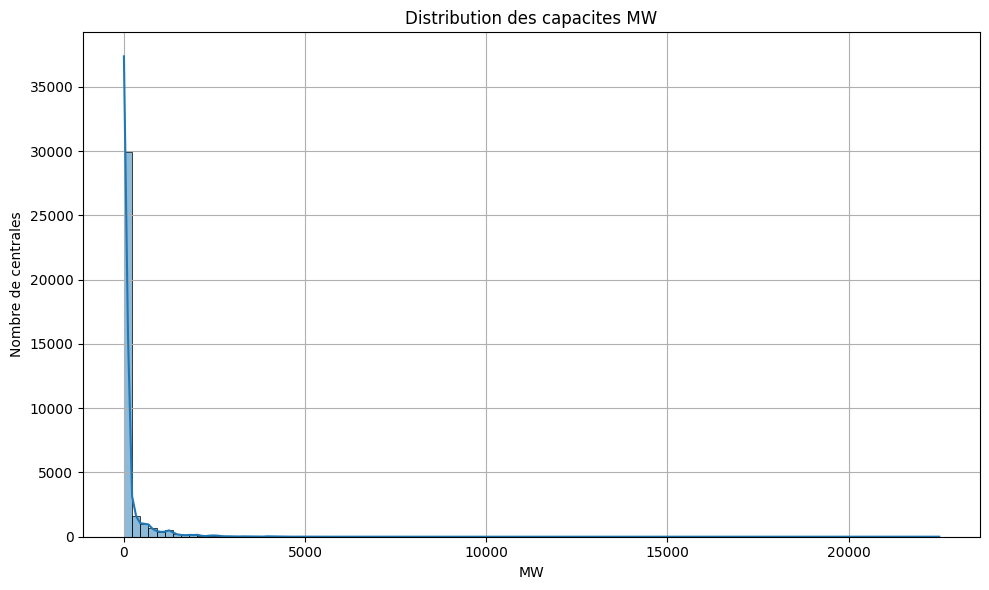

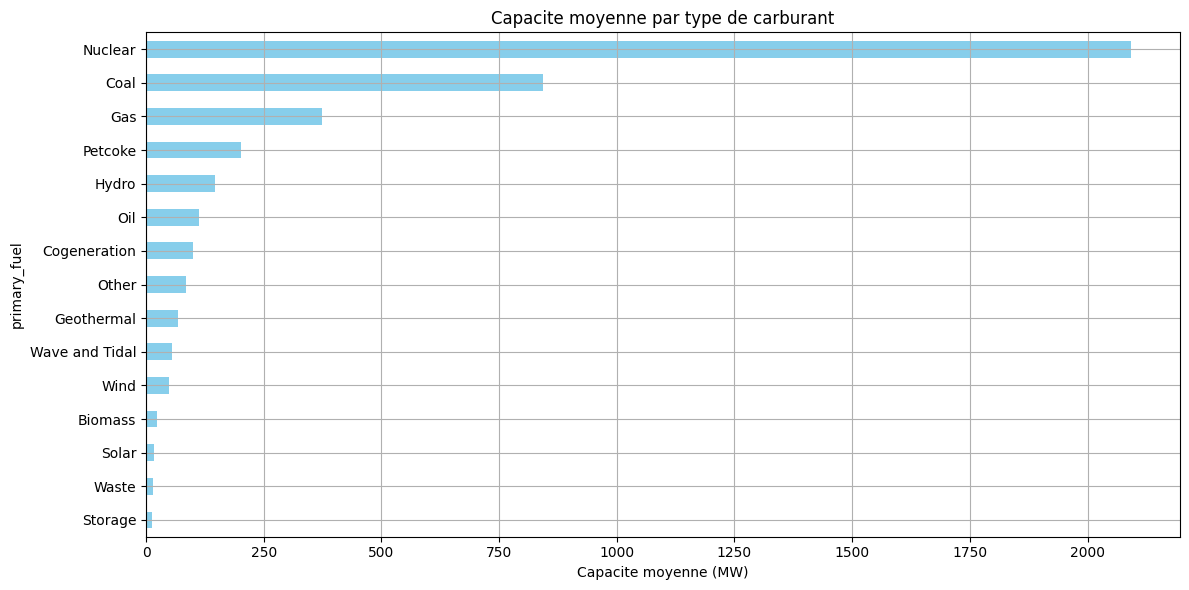

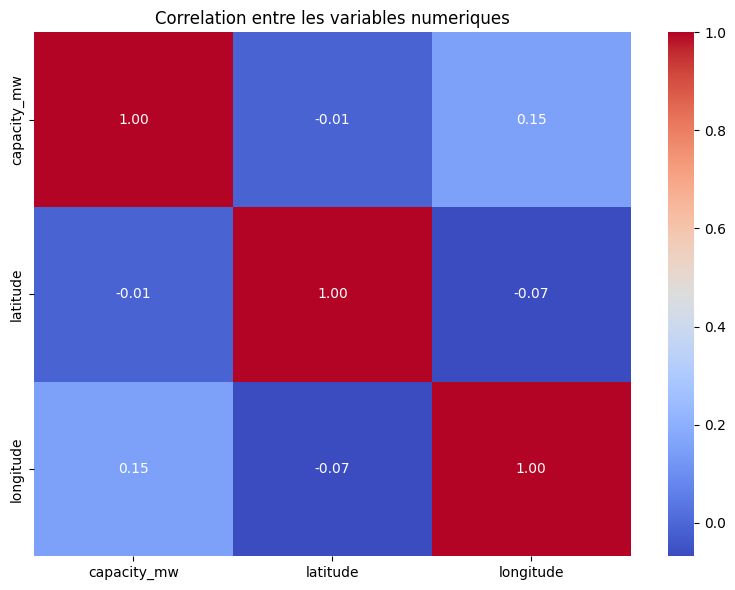

In [16]:
# conversion des colonnes numeriques importantes
df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# suppression des lignes sans valeur de capacite
df = df.dropna(subset=['capacity_mw'])

# statistiques de base sur la capacite
print("\nStatistiques de la capacite :")
print(df['capacity_mw'].describe())

# top 10 des pays avec le plus de centrales
print("\nTop 10 des pays avec le plus de centrales :")
print(df['country_long'].value_counts().head(10))

# distribution par type de carburant
print("\nNombre de centrales par carburant :")
print(df['primary_fuel'].value_counts())

# capacite moyenne par type de carburant
print("\nCapacite moyenne par carburant :")
print(df.groupby('primary_fuel')['capacity_mw'].mean().sort_values(ascending=False))

# test d'hypothese simple : comparaison charbon vs solaire
coal = df[df['primary_fuel'] == 'Coal']['capacity_mw'].dropna()
solar = df[df['primary_fuel'] == 'Solar']['capacity_mw'].dropna()

stat, pval = ttest_ind(coal, solar, equal_var=False)

print(f"\nTest entre charbon et solaire : t = {stat:.2f}, p = {pval:.4f}")
if pval < 0.05:
    print("Resultat significatif : difference entre les moyennes.")
else:
    print("Pas de difference significative.")

# visualisation : distribution des capacites
plt.figure(figsize=(10, 6))
sns.histplot(df['capacity_mw'], bins=100, kde=True)
plt.title("Distribution des capacites MW")
plt.xlabel("MW")
plt.ylabel("Nombre de centrales")
plt.grid(True)
plt.tight_layout()
plt.show()

# visualisation : capacite moyenne par carburant
plt.figure(figsize=(12, 6))
df.groupby('primary_fuel')['capacity_mw'].mean().sort_values().plot(kind='barh', color='skyblue')
plt.title("Capacite moyenne par type de carburant")
plt.xlabel("Capacite moyenne (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# heatmap de correlation
num_df = df[['capacity_mw', 'latitude', 'longitude']].dropna()
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation entre les variables numeriques")
plt.tight_layout()
plt.show()